<a href="https://colab.research.google.com/github/AnhMcConnell/Tensorflow-2-and-Keras-Deep-Learning-Bootcamp/blob/main/02_Autoencoder_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Autoencoder Exercise

## Complete the Tasks Below

**TASK: Run the imports below**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**TASK: Run the import line below to read in the data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving UK_foods.csv to UK_foods (1).csv


In [3]:
import io

In [4]:
data = pd.read_csv(io.BytesIO(uploaded['UK_foods.csv']))

**TASK: Display the DataFrame**

In [5]:
#CODE HERE
data = data.set_index('Unnamed: 0')

In [6]:
data = data.rename_axis(None)

In [7]:
data.head(2)

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267


,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


**TASK: Transpose the DataFrame so that the columns are now the index.**

In [8]:
#CODE HERE
data.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [16]:
data

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TASK: Create a heatmap from the DataFrame. Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

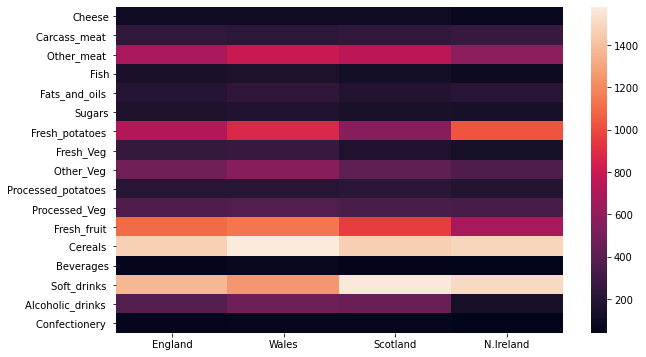

In [9]:
#CODE HERE
plt.figure(figsize=(10, 6))
sns.heatmap(data)

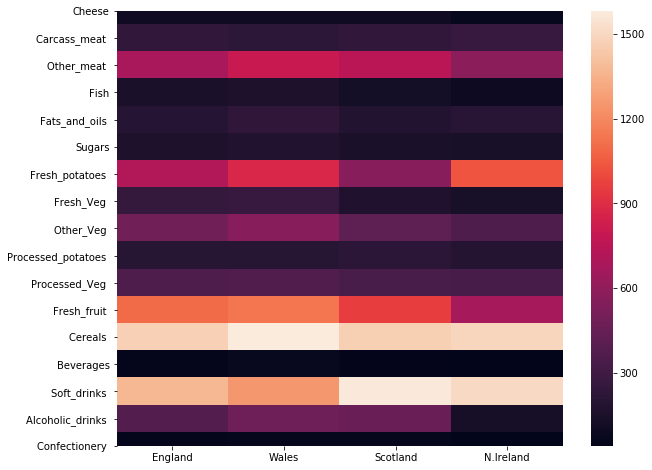

**TASK: Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.**

In [10]:
#CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GaussianNoise
from tensorflow.keras.optimizers import SGD

In [20]:
17*17

289

**TASK: Create an encoder. In the solutions we built one that went 17 --> 8 --> 4 --> 2**

In [11]:
#CODE HERE
encoder = Sequential()
# Add layers
encoder.add(Dense(units=8, activation='relu', input_shape=[17]))
encoder.add(Dense(units=4, activation='relu', input_shape=[8]))
encoder.add(Dense(units=2, activation='relu', input_shape=[4]))


**TASK: Create a decoder. In the solutions we built one that went 2-->4-->8-->17**

In [12]:
#CODE HERE
decoder = Sequential()
# Add layers
decoder.add(Dense(units=4, activation='relu', input_shape=[2]))
decoder.add(Dense(units=8, activation='relu'))
decoder.add(Dense(units=17, activation='relu'))


**TASK: Combine the encoder and decoder to be an autoencoder and compile the model.**

In [13]:
#CODE HERE
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer=SGD(lr=0.5))

**TASK: Create a MinMaxScaler to scale the data. Make sure to transpose the data, since we really have 17 feature columns and only 4 rows (one per country).**

In [14]:
#CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [17]:
scaled_data = scaler.fit_transform(data.transpose())
scaled_data

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [ ]:
# NOTE the shape should be 17 columns by 4 rows.

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

**TASK: Fit the autoencoder to the scaled data for 15 epochs.**

In [18]:
#CODE HERE
autoencoder.fit(scaled_data, scaled_data, epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 375ms/step - loss: 0.4269
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4221
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4028
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3623
Epoch 5/15
1/1 [==============================] - 0s 11ms/step - loss: 0.3304
Epoch 6/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3047
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2838
Epoch 8/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2669
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2534
Epoch 10/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2428
Epoch 11/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2345
Epoch 12/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2282
Epoch 13/15
1/1 [==============================] - 0s 4ms/step - loss:

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 1s 139ms/sample - loss: 0.4271
Epoch 2/15
4/4 [==============================] - 0s 249us/sample - loss: 0.3847
Epoch 3/15
4/4 [==============================] - 0s 249us/sample - loss: 0.2931
Epoch 4/15
4/4 [==============================] - 0s 249us/sample - loss: 0.2485
Epoch 5/15
4/4 [==============================] - 0s 249us/sample - loss: 0.2284
Epoch 6/15
4/4 [==============================] - 0s 230us/sample - loss: 0.2202
Epoch 7/15
4/4 [==============================] - 0s 755us/sample - loss: 0.2160
Epoch 8/15
4/4 [==============================] - 0s 248us/sample - loss: 0.2101
Epoch 9/15
4/4 [==============================] - 0s 249us/sample - loss: 0.2065
Epoch 10/15
4/4 [==============================] - 0s 498us/sample - loss: 0.2037
Epoch 11/15
4/4 [==============================] - 0s 250us/sample - loss: 0.2028
Epoch 12/15
4/4 [==============================] - 0s 498us/sample - loss: 0.1995
Epoch 

**TASK: Run the scaled data through only the encoder and predict the reduced dimensionalty output. Note: You will most likely get different results than us due to random initialiations.**

In [19]:
#CODE HERE
encoder_dim = encoder.predict(scaled_data)

In [20]:
encoder_dim

array([[0.03198741, 0.        ],
       [0.03198741, 0.        ],
       [0.10503346, 0.        ],
       [0.03694864, 0.        ]], dtype=float32)

array([[1.0482036 , 0.        ],
       [1.2070727 , 0.        ],
       [1.1669513 , 0.        ],
       [0.05854838, 0.        ]], dtype=float32)

**TASK: Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [21]:
#Code here
data.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [22]:
results = pd.DataFrame(data=encoder_dim, columns=['C1', 'C2'],index=data.transpose().index)

In [23]:
results

,C1,C2
England,0.031987,0.0
Wales,0.031987,0.0
Scotland,0.105033,0.0
N.Ireland,0.036949,0.0


In [24]:
results = results.reset_index()

In [26]:
results

,index,C1,C2
0,England,0.031987,0.0
1,Wales,0.031987,0.0
2,Scotland,0.105033,0.0
3,N.Ireland,0.036949,0.0


,index,C1,C2
0,England,1.048204,0.0
1,Wales,1.207073,0.0
2,Scotland,1.166951,0.0
3,N.Ireland,0.058548,0.0


**TASK: Now plot out these results in a scatterplot, labeled by their respective country. You should see N. Ireland further away from the other points (but not necessarily to the left or the right, could be centered further away from the others).**

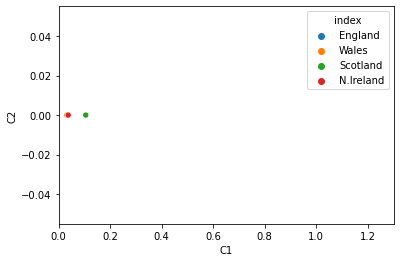

In [34]:
#CODE HERE
plt.xlim(0,1.3)
sns.scatterplot(x='C1', y='C2', hue='index',data=results)

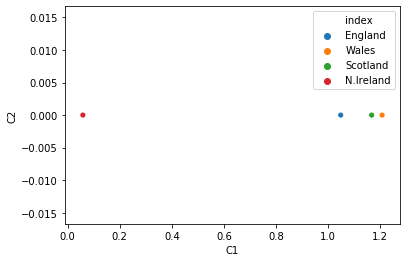

 Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain. (If you're confused about the differences among England, the UK and Great Britain, see: this [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)